# Damped Harmonic Motion

This notebook provides an interactive environment to explore the concepts of damped harmonic motion

In [1]:
from IPython.display import HTML

In [2]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
%matplotlib inline

from ipywidgets import *
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0,2*np.pi,0.01)

In real oscillators, friction, or damping, slows the motion of the system. Due to frictional force, the velocity decreases in proportion to the acting frictional force. While simple harmonic motion oscillates with only the restoring force acting on the system, damped harmonic motion experiences friction.  
  
**Equation for DHM:** 
$$\ddot{x} + \gamma\dot{x}+{\omega_{0}}^{2} x = 0$$  
  
where $\gamma$ is a coeficient given by:  
$$\gamma = \frac{b}{m}$$  
$b$ is the damping constant 

In [5]:
def dampeq(Y, t, omega, gamma):
    return [Y[1], -(omega**2)* Y[0]-gamma*Y[1]]

In [6]:

def damp(critical, omega, gamma):
    global t
    if critical == 'on':
        omega = np.sqrt((gamma**2)/4)
    asol = integrate.odeint(dampeq, [1, 0], t, args=(omega, gamma))
    fig = plt.plot(t, asol[:,0])
    plt.ylim(-1.1,1.1)
    plt.xlim(0, 2*np.pi)
    plt.xlabel("time, s")
    plt.ylabel("Amplitude, arb")
    if critical == 'on':
        plt.setp(fig, color='g', linewidth=2.0)
        plt.legend(['Critical damping'], loc=3)
    elif (gamma**2)/4 > omega**2:
        plt.setp(fig, color='r', linewidth=2.0)
        plt.legend(['Over damping'], loc=3)
    else:
        plt.setp(fig, color='b', linewidth=2.0)
        plt.legend(['Under damping'], loc=3)

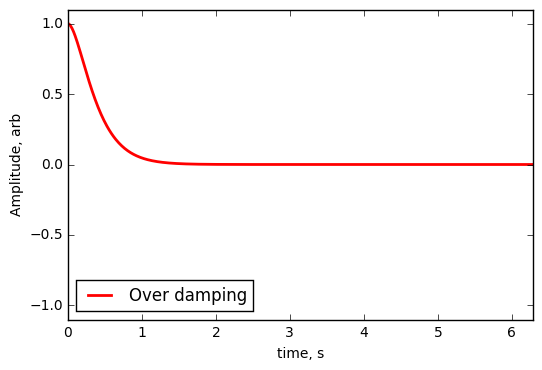

In [7]:
interact(damp, critical = RadioButtons(options = ['off', 'on']), omega =(0,10,0.1), gamma = (0,20,0.1));

# Critical, under & over damping. 
The oscillator is criticaly damped when $\omega_{0}^{2} = \gamma^{2}/4$  
The oscillator is under damped when $\omega_{0}^{2} > \gamma^{2}/4$  
The oscillator is over damped when $\omega_{0}^{2} < \gamma^{2}/4$